# Deep Learning for Survival Analysis

---

## Table of content

* [1. Motivation](#motivation)
* [2. Introduction to Survival Analysis](#introduction_sa)
** [2.1 Common terms](#terms)
** [2.2 Survival function](#survival_function)
** [2.3 Hazard function](#hazard_function)
* [3. Dataset](#dataset)
* [4. Standard Methods in Survival Analysis](#standard_methods)
** [4.1 Kaplan-Meier estimate](#kmf)
** [4.2 Cox Proportional Hazard Model](#coxph)
** [4.3 Time-Varying Cox Regression Model](#time_cox)
** [4.4 Random Survival Forests](#rsf)
* [5. Deep Learning in Survival Analysis](#deeplearning_sa)
** [5.1 DeepSurv](#deepsurv)
** [5.2 Deep Hit](#deephit)
* [6. Evaluation](#evaluation) 
* [7. Conclusion](#conclusion)
* [8. References](#references)

---

## 1. Motivation - Business case <a class="anchor" id="motivation"></a>
With the financial crisis hitting the United States and Europe in 2008, the International Accounting Standards Board (IASB) decided to revise their accounting standards for financial instruments, e.g. loans or mortgages to address perceived deficiencies which were believed to have contributed to the magnitude of the crisis.The result was the International Financial Reporting Standard (IFRS) 9 that became effective for all financial years beginning on or after 1 January 2018. [1]

Previously impairment losses on financial assets were only recognised to the extent that there was an objective evidence of impairment, meaning a loss event needed to occur before an impairment loss could be booked. [2] The new accounting rules for financial instruments require banks to build provisions for expected losses in their loan portfolio. The loss allowance has to be recognised before the actual credit loss is incurred. It is a more forward-looking approach than its predecessor with the aim to result in a more timely recognition of credit losses. [3]

To implement the new accounting rules banks need to build models that can evaluate a borrower's risk as accurately as possible.  A key credit risk parameter is the probability of default. Classification techniques such as logistic regression and decision trees can be used in order to classify the risky from the non-risky loans. These classification techniques however do not take the timing of default into account. With the use of survival analysis more accurate credit risks calculations are enabled since these analysis refers to a set of statistical techniques that is able to estimate the time it takes for a customer to default.

---

# 2. Introduction to Survival Analysis <a class="anchor" id="introduction_sa"></a>

Survival analysis also called time-to event analysis refers to the set of statistical analyses that takes a series of observations and attempts to estimate the time it takes for an event of interest to occur. 

The development of survival analysis dates back to the 17th century with the first life table ever produced by English statistician John Graunt in 1662. The name ‚Survival Analysis‘ comes from the longstanding application of these methods since throughout centuries they were solely linked to investigating mortality rates. However, during the last decades the applications of the statistical methods of survival analysis have been extended beyond medical research to other fields. [4]

Survival Analysis can be used in the field of health insurance to evaluate insurance premiums. It can be a useful tool in customer retention e.g. in order to estimate the time a customer probably will discontinue its subscription. With this information the company can intervene with some incentives early enough to retain its customer. The accurate prediction of upcoming churners results in highly-targeted campaigns, limiting the resources spent on customers who likely would have stayed anyway.
The methods of survival analysis can also be applied in the field of engineering, e.g. to estimate the remaining useful life of machines.

## 2.1 Common terms <a class="anchor" id="terms"></a>
Survival analysis is a collection of data analysis methods with the outcome variable of interest ‚time to event‘. In general ‚event‘ describes the event of interest, also called **death event**, ‚time‘ refers to the point of time of first observation, also called **birth event**, and ‚time to event‘ is the **duration** between the first observation and the time the event occurs. [5]
The subjects whose data were collected for survival analysis usually do not have the same time of first observation. A subject can enter the study at any time. Using durations ensure a necessary relativeness. [6] Referring to the business case the birth event is the initial recognition of a loan, the death event, consequently the event of interest, describes the time a customer defaulted and the duration is the time between the initial recognition and the event of default.

During the observation time not every subject will experience the event of interest. Consequently it is unknown if the subjects will experience the event of interest in the future. The computation of the duration, the time from the first observation to the event of interest, is impossible. This special type kind of missing data can emerge due to two reasons:

1. The subject is still part of the study but has not experienced the event of interest yet.
2. The subject experienced a different event which also led to the end of study for this subject.

In survival analysis this missing data is called **censorship** which refers to the inability to observe the variable of interest for the entire population. However, the censoring of data must be taken into account, dropping unobserved data would underestimate customer lifetimes and bias the results. Hence the particular subjects are labelled ‚censored‘.
Since for the censored subjects the death event could not be observed, the type of censorship is called right censoring which is the most common one in survival analysis. As opposed to this there is left censoring in case the birth event could not be observed. 

The first reason for censored cases regarding the use case are loans that have not matured yet and did not experience default by this time at the the moment of data gathering.

The second reason for censorship refers to loans that did not experience the event of default but the event of early repayment. With this the loan is paid off which results in the end of observation for this loan. This kind of censoring is used in models with one event of interest. [7]

In terms of different application fields an exact determination of the birth and death event is vital.
Following there are a few examples of birth and death events as well as possible censoring cases, besides the general censoring case that the event of interest has not happened yet, for various use cases in the industry:

Application field | Birth event | Death event | Censoring example
------------------|-------------|-------------|------------------
Predictive maintenance in mechanical operations|Time the machine was started for a continuous use|Time when the machine breaks down|Machine breaks down due to a fire in the factory building
Customer analytics|Customer starts subscription|Time when customer unsubscribe|Customer dies during the observation time
Medical research on breast cancer patients|Time the subject was first diagnosed|Time the patient died due to breast cancer|Patient died due to a cardiovasculae disease
Lifetimes of political leaders around the world|Start of the tenure|Retirement|Leader dies during the tenure

---

## 2.2 Survival Function<a class="anchor" id="survival_function"></a>
The set of statistic methods related to survival analysis has the goal to estimate the survival function from survival data. The survival function S(t) defines the probability that a subject of interest will survive beyond time t, or equivalently, the probability that the duration will be at least t. [8] The survival function of a population is defined as follows:

$$S(t) = Pr(T > t)$$

T is the random lifetime taken from the population under study and cannot be negative. With regard to the business case it is the amount of time a customer is able to pay his loan rates, he is not defaulting. The survival function S (t) outputs values between 0 and 1 and is a non-increasing function of t.
At the start of the study (t=0), no subject has experienced the event yet. Therefore the probability S(0) of surviving beyond time 0 is one. S(∞) =0 since if the study period were limitless, presumably everyone eventually would experience the event of interest and the probability of surviving would ultimately fall to zero. In theory the survival function is smooth, in practice the events are observed on a concrete time scale, e.g. days, weeks, months, etc., such that the graph of the survival function is like a step function. [9]

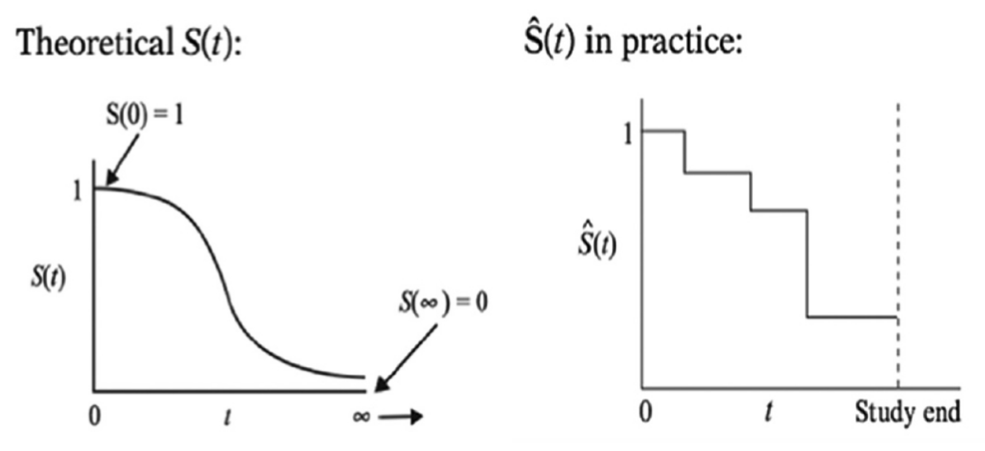

In [0]:
#@title
from IPython.display import Image
Image(filename='Survival_curve.png',width=800, height=350) 

---

## 2.3 Hazard Function<a class="anchor" id="hazard_function"></a>
Derived from the survival function the hazard function h(t) gives the probability of the death event occurring at time t, given that the subject did not experience the death event until time t. It describes the instantaneous potential per unit time for the event to occur. [10]

$$h(t) = \lim_{\delta t\to 0}\frac{Pr(t≤T≤t+\delta t | T>t)}{\delta t}$$

Therefore the hazard function models which periods have the highest or lowest chances of an event. In contrast to the survival function, the hazard function does not have to start at 1 and go down to 0. The hazard rate usually changes over time. It can start anywhere and go up and down over time. For instance the probability of defaulting on a mortgage may be low in the beginning but can increase over the time of the mortgage.

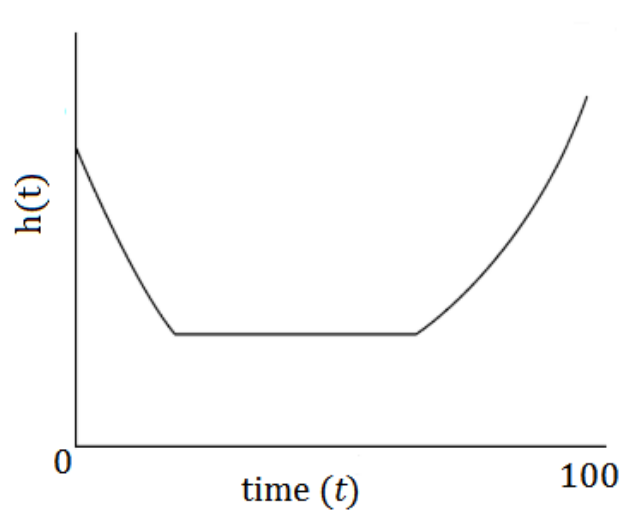

In [0]:
from IPython.display import Image
Image(filename='hazard-function.png',width=400, height=350) 

The above shown graph is a theoretical example for a hazard function. [11] This specific hazard function is also called bathtub curve due to its form. This graph shows the probability of an event of interest to occur over time. 

It could describe the probability of a customer unsubscribing from a magazine over time. Within the first 30 days the risk to unsubscribe is high, since the customer is testing the product. But if the customer likes the content, meaning he "survives" the first 30 days, the risk of unsubscribing decreased and stagnates at lower level. After a while the risk is increasing again since the customer maybe needs different input or got bored over time. Hence the graph gives the important information when to initiate incentives for those customers whose risk to unsubsribe is about to increase in order to retain them.

The main goal of survival analysis is to estimate and interpret survival and/or hazard functions from survival data. 

# 3. Dataset <a class="anchor" id="dataset"></a>

The dataset for the following survival analysis contains data of subjects that took on a mortgage. In this case the birth event is the time when the subject was first observed for the study and the death event is the default of the subject. Thw duration is the time between the birth and death event. The dataset does not contain any lost or withdrawn subjects but there exist subjects who have not defaulted yet. These subjects will be labelled ‚censored‘ in further analysis.

In [0]:
import pandas as pd
from pandas import DataFrame

import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
plt.rcParams.update({'figure.figsize':(16,7), 'figure.dpi':100})
plt.style.use('seaborn-white')

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Load and explore the given dataset

In [0]:
data = pd.read_csv('mortgage.csv', sep = ",")

In [0]:
data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [0]:
print("Maximal lifetime (in days) in dataset: ", data['time'].max())

Maximal lifetime (in days) in dataset:  60


In [0]:
data.shape

(622489, 23)

### Counting the risks

In [0]:
data['default_time'].value_counts()

0    607331
1     15158
Name: default_time, dtype: int64

In [0]:
data['payoff_time'].value_counts()

0    595900
1     26589
Name: payoff_time, dtype: int64

In [0]:
data['status_time'].value_counts()

0    580742
2     26589
1     15158
Name: status_time, dtype: int64

### Checking the missing values in dataset and replacing them with means

In [0]:
# Check for missing values
data.isnull().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

### Rename columns for more convenient usage

In [0]:
data = data.rename(columns={"orig_time": "origination_time", "mat_time": "maturity_time",
                            "hpi_time" : "house_price_index_time",  "hpi_orig_time" : "house_price_index_orig_time", 
                            "uer_time" : "unemployment_rate_time", 
                            "REtype_CO_orig_time" : "real_estate_condominium", 
                            "REtype_PU_orig_time" : "real_estate_planned_urban_dev", 
                            "REtype_SF_orig_time" : "real_estate_single_family_home", "Interest_Rate_orig_time" : "interest_rate_orig_time"})

---

- ## Data preprocessing

### Max time for each borrower

In [0]:
time_max = data.groupby(['id']).agg({'time' : 'max'}).reset_index()
time_max.rename(columns = {'time' : 'time_max'}, inplace = True)

In [0]:
data = pd.merge(data,time_max, on ='id')

In [0]:
time_max[time_max.columns[1:]].mean()

time_max    36.17074
dtype: float64

In [0]:
time_max.head()

,id,time_max
0,1,48
1,2,26
2,3,29
3,4,60
4,5,27


### Duration column

In [0]:
data['total_obs_time'] = data.apply(lambda r: int(r['time_max'] - r['first_time']+1), axis = 1)

### Missing values imputation

In [0]:
data['LTV_time'].fillna((data['LTV_time'].mean()),inplace=True)

### Backup Copy

In [0]:
data_all = data.copy()

In [0]:
df = data.copy()

In [0]:
df = df[df.id != df.id.shift(-1)]

### Default event distribution graph

In [0]:
df_map = df.copy()

mapping = {0: 'Censored', 1: 'Event Occured'}
df_map = df_map.replace({'default_time': mapping})

In [0]:
def_risk  = df_map['default_time'].value_counts()

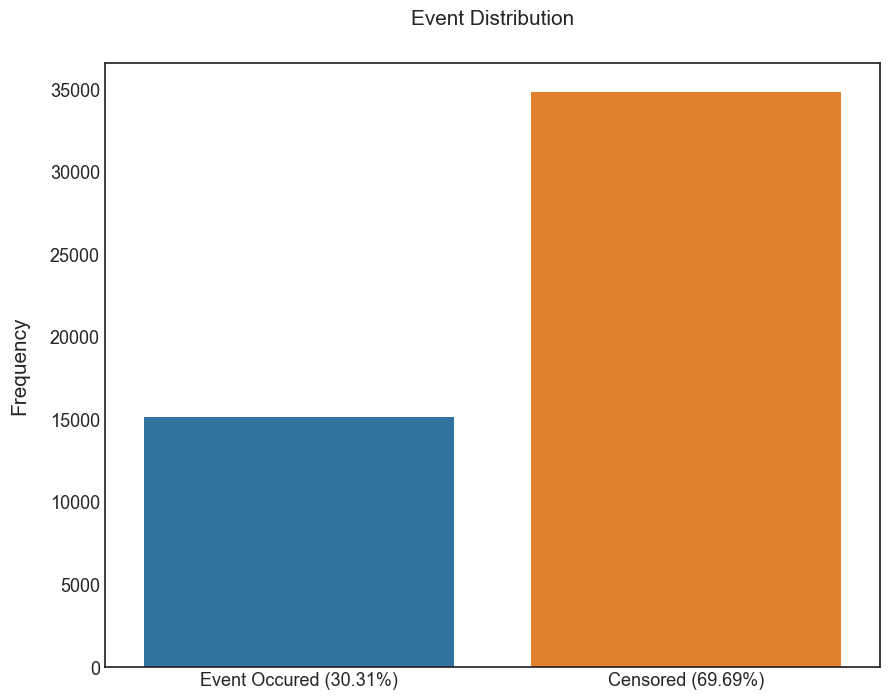

In [0]:
cens = df_map['default_time'].value_counts()[0]
ev = df_map['default_time'].value_counts()[1]
cens_per = cens / df_map.shape[0] * 100
ev_per = ev / df_map.shape[0] * 100

plt.figure(figsize=(10, 8))
sns.countplot(df_map['default_time'])

plt.xlabel('', size=15, labelpad=15)
plt.ylabel('Frequency', size=15, labelpad=15)
plt.xticks((1, 0), ['Censored ({0:.2f}%)'.format(cens_per), 'Event Occured ({0:.2f}%)'.format(ev_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Event Distribution', size=15, y=1.05)

plt.show()

In [0]:
df['default_time'].value_counts()

0    34846
1    15154
Name: default_time, dtype: int64

In [0]:
df['payoff_time'].value_counts()

1    26589
0    23411
Name: payoff_time, dtype: int64

In [0]:
df['status_time'].value_counts()

2    26589
1    15154
0     8257
Name: status_time, dtype: int64

In [0]:
'''
cat_features = ['investor_orig_time', 'real_estate_single_family_home', 'real_estate_planned_urban_dev']

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='default_time', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Borrower Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Defaulted', 'Defaulted'], loc='upper center', prop={'size': 18})
    plt.title('Count of Defaults in {} Feature'.format(feature), size=20, y=1.05)

plt.show()
'''

"\ncat_features = ['investor_orig_time', 'real_estate_single_family_home', 'real_estate_planned_urban_dev']\n\nfig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 20))\nplt.subplots_adjust(right=1.5, top=1.25)\n\nfor i, feature in enumerate(cat_features, 1):    \n    plt.subplot(2, 3, i)\n    sns.countplot(x=feature, hue='default_time', data=df)\n    \n    plt.xlabel('{}'.format(feature), size=20, labelpad=15)\n    plt.ylabel('Borrower Count', size=20, labelpad=15)    \n    plt.tick_params(axis='x', labelsize=20)\n    plt.tick_params(axis='y', labelsize=20)\n    \n    plt.legend(['Not Defaulted', 'Defaulted'], loc='upper center', prop={'size': 18})\n    plt.title('Count of Defaults in {} Feature'.format(feature), size=20, y=1.05)\n\nplt.show()\n"

### Dropping out some columns

In [0]:
data_all = data_all.drop(['status_time', 'first_time', 'time_max', 'payoff_time'], axis = 1)

data_one = df.copy()
data_one = data_one.drop(['time', 'status_time', 'first_time', 'time_max', 'payoff_time'], axis = 1)

In [0]:
print(data_all.shape, data_one.shape)

(622489, 21) (50000, 20)


In [0]:
data_cox = data_one.copy()

### Additional: Censorhip plot

In [0]:
current_time = 12

In [0]:
actual_lifetimes = data_one.total_obs_time[:30]
actual_lifetimes.index = np.arange(1, len(actual_lifetimes)+1)

In [0]:
actual_lifetimes.head()

1    24
2     2
3     5
4    36
5     3
Name: total_obs_time, dtype: int64

In [0]:
observed_lifetimes = np.minimum(actual_lifetimes, current_time)
observed_lifetimes.head()

1    12
2     2
3     5
4    12
5     3
Name: total_obs_time, dtype: int64

In [0]:
death_observed = actual_lifetimes < current_time
death_observed.head()

1    False
2     True
3     True
4    False
5     True
Name: total_obs_time, dtype: bool

C:\Users\frusi\Anaconda3\envs\sis\lib\site-packages\pandas\core\series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0.5, 1.0, 'Default events for our individuals, at $t=10$')

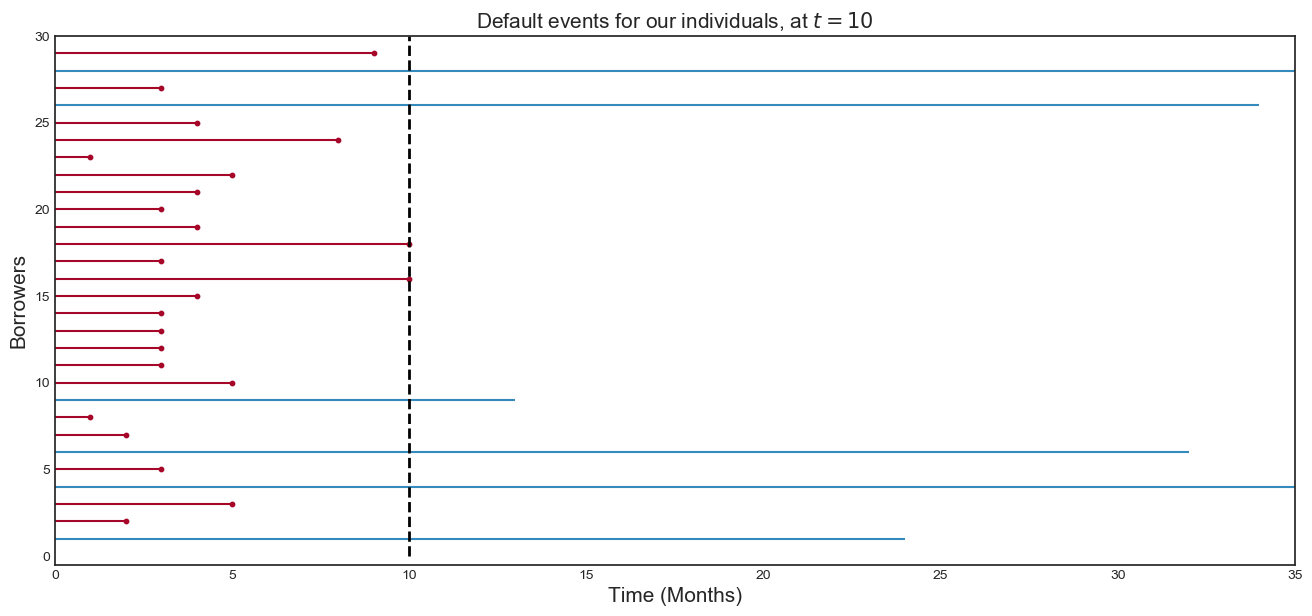

In [0]:
from lifelines.plotting import plot_lifetimes

ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.set_xlim(0, 35)
ax.vlines(10, 0, len(actual_lifetimes), lw=2, linestyles='--')
ax.set_ylabel('Borrowers', fontsize = 15)
ax.set_xlabel("Time (Months)", fontsize = 15)
ax.set_title("Default events for our individuals, at $t=10$", fontsize = 15)

---

# 4. Standard Methods in Survival Analysis<a class="anchor" id="standard_methods_sa"></a>

In [0]:
scaler = StandardScaler()

In [0]:
data_cox = data_cox.set_index('id')

In [0]:
'''
xx = ['balance_time', 'LTV_time',
       'interest_rate_time', 'house_price_index_time', 'gdp_time', 'unemployment_rate_time',
       'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'interest_rate_orig_time', 'house_price_index_orig_time']

data_cox[xx] = scaler.fit_transform(data_cox[xx])
'''

"\nxx = ['balance_time', 'LTV_time',\n       'interest_rate_time', 'house_price_index_time', 'gdp_time', 'unemployment_rate_time',\n       'balance_orig_time', 'FICO_orig_time',\n       'LTV_orig_time', 'interest_rate_orig_time', 'house_price_index_orig_time']\n\ndata_cox[xx] = scaler.fit_transform(data_cox[xx])\n"

## 4.1 Kaplan Meier Estimator<a class="anchor" id="kmf"></a>

In [0]:
import lifelines

### Fitting the Kaplan-Meier estimate for the survival function

In [0]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [0]:
T = data_cox["total_obs_time"]
E = data_cox["default_time"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 50000 total observations, 34846 right-censored observations>

### Plot for KMF

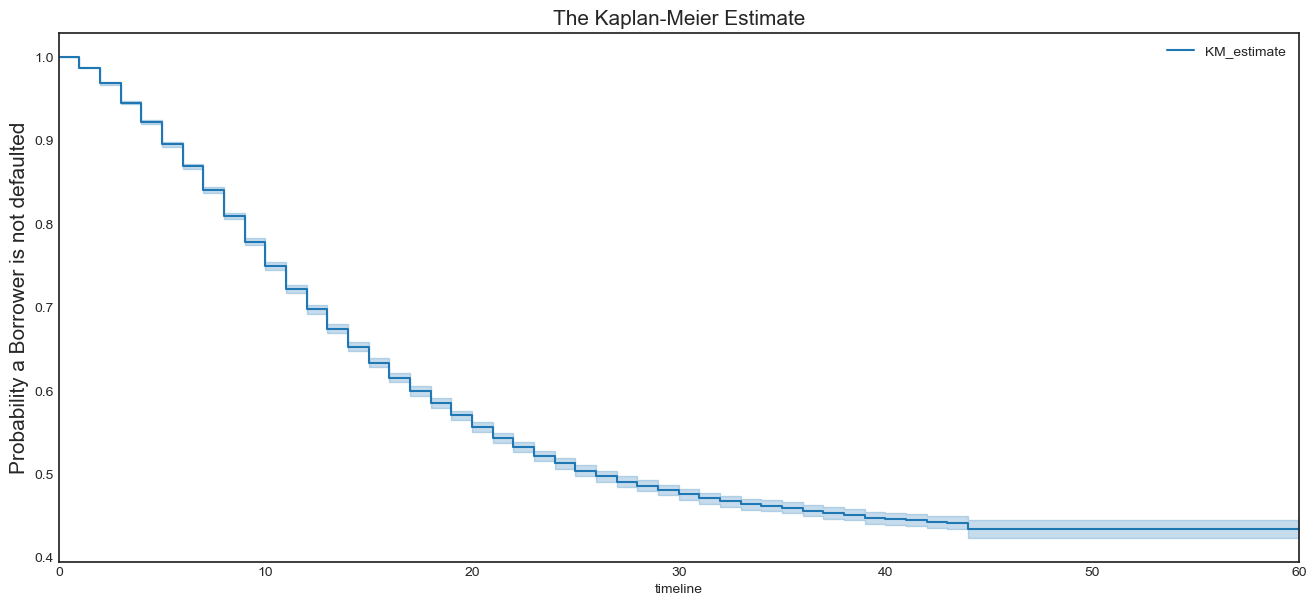

In [0]:
kmf.plot()

plt.title("The Kaplan-Meier Estimate", fontsize = 15)
plt.ylabel("Probability a Borrower is not defaulted", fontsize = 15)

plt.show()

### The estimated median time to event

Return the unique time point, t, such that S(t) = 0.5. This is the “half-life” of the population, and a robust summary statistic for the population, if it exists.

In [0]:
kmf.median_survival_time_

26.0

### A summary of the life table

In [0]:
kmf.event_table[:10]

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,50000,50000
1.0,3773,623,3150,0,50000
2.0,3992,892,3100,0,46227
3.0,3693,999,2694,0,42235
4.0,3557,965,2592,0,38542
5.0,2971,996,1975,0,34985
6.0,2768,953,1815,0,32014
7.0,3029,936,2093,0,29246
8.0,2583,985,1598,0,26217


### Estimated survival function

In [0]:
kmf_surv = kmf.survival_function_

In [0]:
kmf_surv[:10]

,KM_estimate
timeline,
0.0,1.000000
1.0,0.987540
2.0,0.968484
3.0,0.945576
4.0,0.921901
5.0,0.895656
6.0,0.868993
7.0,0.841182
8.0,0.809578


---

## 4.2 Cox Proportional Hazard Model<a class="anchor" id="coxph"></a>

In [0]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1)
cph.fit(data_cox, duration_col='total_obs_time', event_col='default_time', show_progress = True)

Iteration 1: norm_delta = 1.07434, step_size = 0.9500, ll = -151616.37256, newton_decrement = 7849.88388, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.66941, step_size = 0.9500, ll = -157315.04540, newton_decrement = 11492.51839, seconds_since_start = 0.1
Iteration 3: norm_delta = 0.44479, step_size = 0.9500, ll = -146405.50893, newton_decrement = 1879.77130, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.07525, step_size = 0.9310, ll = -144506.16389, newton_decrement = 235.40711, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.05009, step_size = 1.0000, ll = -144222.24240, newton_decrement = 49.75079, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.02288, step_size = 1.0000, ll = -144163.67104, newton_decrement = 5.93358, seconds_since_start = 0.2
Iteration 7: norm_delta = 0.00403, step_size = 1.0000, ll = -144157.19919, newton_decrement = 0.13884, seconds_since_start = 0.2
Iteration 8: norm_delta = 0.00011, step_size = 1.0000, ll = -144157.05760, newton_de

<lifelines.CoxPHFitter: fitted with 50000 total observations, 34846 right-censored observations>

### Filter down to just censored subjects to predict remaining survival

In [0]:
censored_subjects = data_cox.loc[~data_cox['default_time'].astype(bool)]
censored_subjects_last_obs = censored_subjects['total_obs_time']

In [0]:
censored_subjects.head()

,origination_time,maturity_time,balance_time,LTV_time,interest_rate_time,house_price_index_time,gdp_time,unemployment_rate_time,real_estate_condominium,real_estate_planned_urban_dev,real_estate_single_family_home,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,interest_rate_orig_time,house_price_index_orig_time,default_time,total_obs_time
id,,,,,,,,,,,,,,,,,,,
2,18,138,105654.77,65.469851,7.680,225.10,2.151365,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,2
3,-6,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,5
4,-2,119,52686.35,34.898842,10.500,189.82,2.836358,5.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,36
5,18,138,52100.71,66.346343,9.155,222.39,2.361722,4.4,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,3
7,18,138,107916.38,77.919574,9.000,225.10,2.151365,4.7,0,0,1,0,109250.0,601,95.0,9.000,186.91,0,2


In [0]:
cph.predict_partial_hazard(censored_subjects).head()

,0
2,1.745313
3,0.591282
4,0.412496
5,2.447832
7,2.246407


In [0]:
cph.predict_survival_function(censored_subjects, times=[5., 25., 50.], conditional_after=censored_subjects_last_obs)

,2,3,4,5,7,8,11,12,13,14,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,50000
5.0,0.861492,0.930291,0.970440,0.789772,0.825394,0.944683,0.791579,0.905416,0.885518,0.783490,...,0.952365,0.945352,0.980546,0.965394,0.964302,0.961157,0.952614,0.967566,0.978198,0.982348
25.0,0.276602,0.645134,0.938723,0.163953,0.191252,0.582798,0.166848,0.467085,0.393964,0.154222,...,0.821048,0.796894,0.923701,0.867377,0.863421,0.852102,0.821917,0.875289,0.914799,0.930579
50.0,0.167542,0.561215,0.938723,0.084516,0.100315,0.463636,0.086562,0.353378,0.280030,0.077737,...,0.780298,0.751528,0.904966,0.836094,0.831299,0.817610,0.781338,0.845701,0.894008,0.913453


### Plotting the coefficients

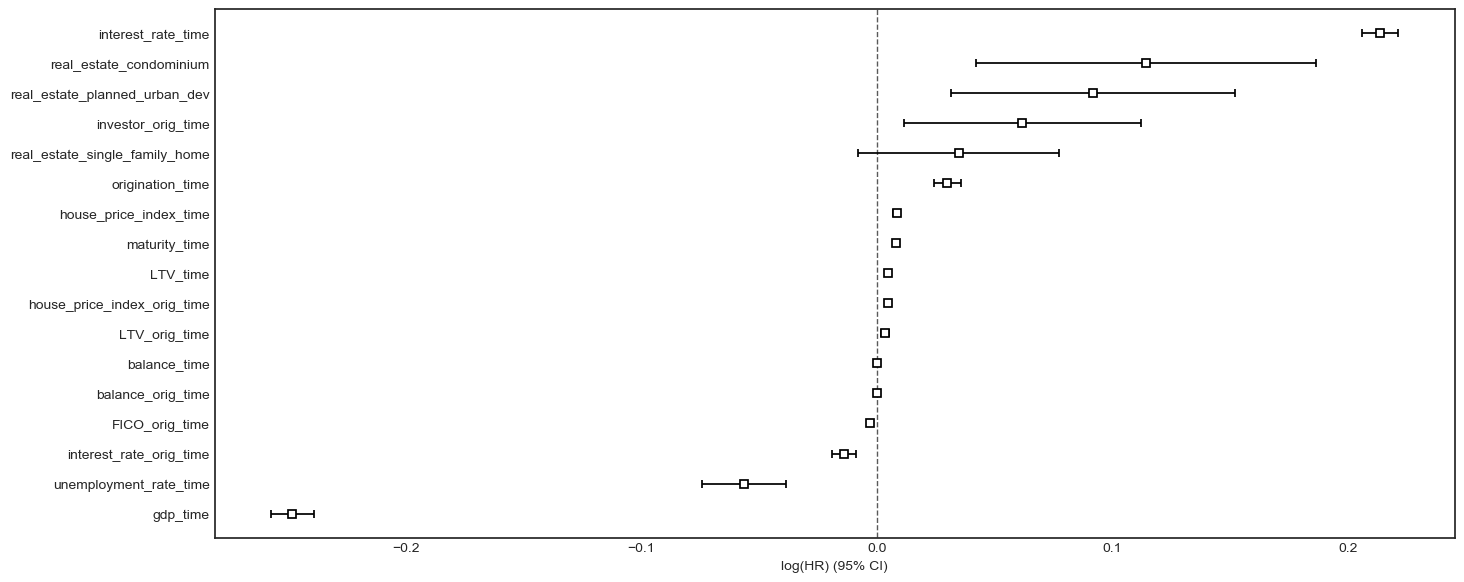

In [0]:
cph.plot()

### Plotting the effect of varying a covariate

After fitting, we can plot what the survival curves look like as we vary a single covariate while holding everything else equal. This is useful to understand the impact of a covariate, given the model. To do this, we use the plot_covariate_groups() method and give it the covariate of interest, and the values to display.

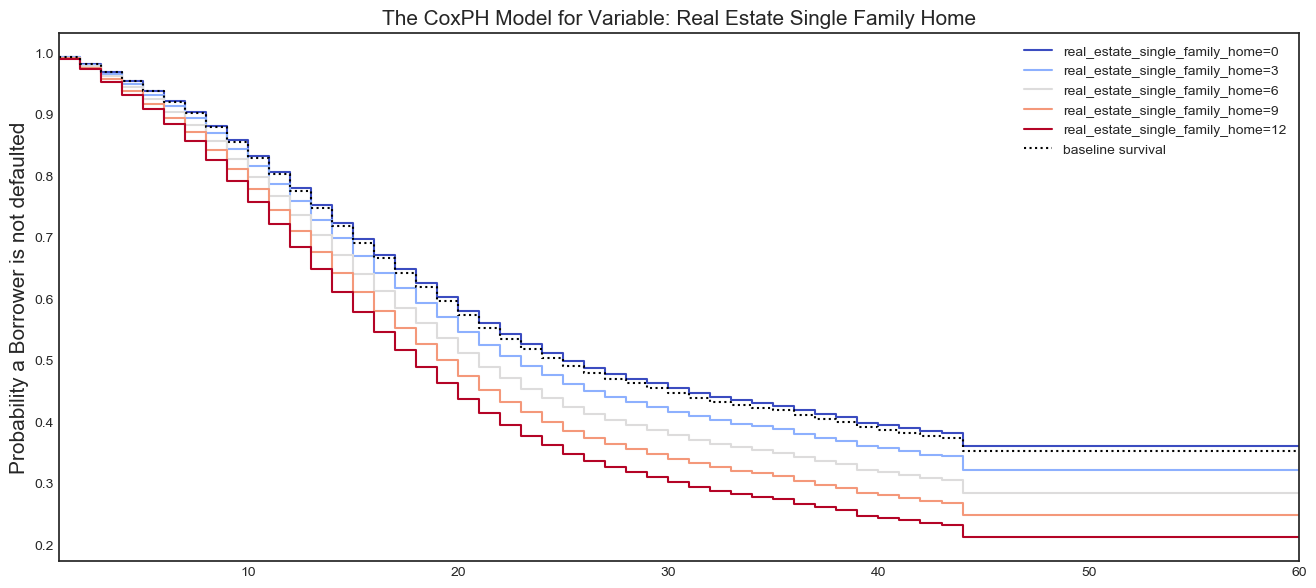

In [0]:
cph.plot_covariate_groups('real_estate_single_family_home', values=range(0, 15, 3), cmap='coolwarm',
                         plot_baseline=True)

plt.title("The CoxPH Model for Variable: Real Estate Single Family Home", fontsize = 15)
plt.ylabel("Probability a Borrower is not defaulted", fontsize = 15)

plt.show()

In [0]:
data_cox.columns

Index(['origination_time', 'maturity_time', 'balance_time', 'LTV_time',
       'interest_rate_time', 'house_price_index_time', 'gdp_time',
       'unemployment_rate_time', 'real_estate_condominium',
       'real_estate_planned_urban_dev', 'real_estate_single_family_home',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'interest_rate_orig_time',
       'house_price_index_orig_time', 'default_time', 'total_obs_time'],
      dtype='object')

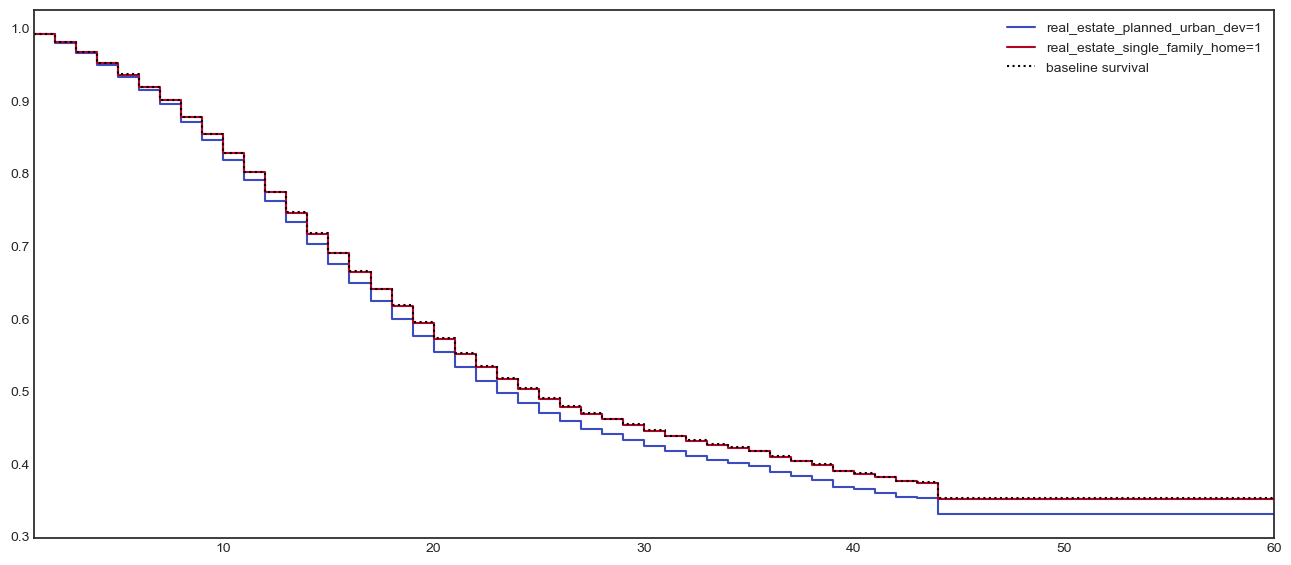

In [0]:
cph.plot_covariate_groups(
    ['real_estate_planned_urban_dev', 'real_estate_single_family_home'],
    np.eye(2),
    cmap='coolwarm')

In [0]:
cph.baseline_hazard_[:15]

,baseline hazard
1.0,0.007255
2.0,0.011592
3.0,0.014221
4.0,0.015132
5.0,0.017309
6.0,0.018385
7.0,0.020376
8.0,0.025215
9.0,0.027927
10.0,0.030304


### Concordance index

concordance-index, also known as the c-index. This measure evaluates the accuracy of the ranking of predicted time. It is in fact a generalization of AUC, another common loss function, and is interpreted similarly:

0.5 is the expected result from random predictions,
1.0 is perfect concordance and,
0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)

In [0]:
cph.score_

0.7764777518247834

or

In [0]:
from lifelines.utils import concordance_index

cindex_cox = concordance_index(data_cox['total_obs_time'], -cph.predict_partial_hazard(data_cox), data_cox['default_time'])

In [0]:
cindex_cox

0.7764777518247834

### The estimated coefficients

Changed in version 0.22.0: use to be .hazards_

In [0]:
cph.params_

origination_time                  0.029912
maturity_time                     0.008111
balance_time                      0.000007
LTV_time                          0.004866
interest_rate_time                0.213809
house_price_index_time            0.008434
gdp_time                         -0.248223
unemployment_rate_time           -0.056415
real_estate_condominium           0.114276
real_estate_planned_urban_dev     0.091901
real_estate_single_family_home    0.034783
investor_orig_time                0.061815
balance_orig_time                -0.000007
FICO_orig_time                   -0.002951
LTV_orig_time                     0.003541
interest_rate_orig_time          -0.013820
house_price_index_orig_time       0.004847
dtype: float64

attribute is available which is the exponentiation of params_

In [0]:
cph.hazard_ratios_

origination_time                  1.030364
maturity_time                     1.008144
balance_time                      1.000007
LTV_time                          1.004878
interest_rate_time                1.238386
house_price_index_time            1.008470
gdp_time                          0.780186
unemployment_rate_time            0.945147
real_estate_condominium           1.121061
real_estate_planned_urban_dev     1.096256
real_estate_single_family_home    1.035395
investor_orig_time                1.063765
balance_orig_time                 0.999993
FICO_orig_time                    0.997054
LTV_orig_time                     1.003547
interest_rate_orig_time           0.986275
house_price_index_orig_time       1.004858
Name: exp(coef), dtype: float64

In [0]:
cph.check_assumptions(data_cox)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'origination_time' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'origination_time' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'origination_time' using pd.cut, and then specify it in
`strata=['origination_time', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'interest_rate_time' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'interest_rate_time' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentat

In [0]:
#cox_strata_duration = data_cox.copy()
#cox_strata_duration['dur_strata'] = pd.cut(cox_strata_duration['total_obs_time'], np.arange(0, 80, 3))
#cox_strata_duration[['total_obs_time', 'dur_strata']].head(10)

### Cross - validation

In [0]:
from lifelines.utils import k_fold_cross_validation

In [0]:
scores = k_fold_cross_validation(cph, data_cox, 'total_obs_time', event_col='default_time', k=6)
print("Print all scores in CV: ", scores)
print(' ')
print("Mean c-index: ", np.mean(scores))
print("Std: ", np.std(scores))

Print all scores in CV:  [0.7932822945633529, 0.77646299524676, 0.780871983194206, 0.7736959995988707, 0.7733554968290542, 0.7755513037778162]
 
Mean c-index:  0.7788700122016766
Std:  0.006900599166743354


#### Some useful functions from lifelines.utils

https://lifelines.readthedocs.io/en/latest/lifelines.utils.html

---

## 4.3 Time-Varying Cox Regression Model<a class="anchor" id="time_cox"></a>

In [0]:
data_cox_time = data_all.copy()

In [0]:
data_cox_time = data_cox_time.drop('total_obs_time', axis = 1)

### Data preprocessing into long format

In [0]:
from lifelines.utils import to_long_format

data_cox_tv = to_long_format(data_cox_time, duration_col = "time")

In [0]:
data_cox_tv.head()

,id,origination_time,maturity_time,balance_time,LTV_time,interest_rate_time,house_price_index_time,gdp_time,unemployment_rate_time,real_estate_condominium,...,real_estate_single_family_home,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,interest_rate_orig_time,house_price_index_orig_time,default_time,start,stop
0,1,-7,113,41303.42,24.498336,9.2,226.29,2.899137,4.7,0,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,25
1,1,-7,113,41061.95,24.483867,9.2,225.10,2.151365,4.7,0,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,26
2,1,-7,113,40804.42,24.626795,9.2,222.39,2.361722,4.4,0,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,27
3,1,-7,113,40483.89,24.735883,9.2,219.67,1.229172,4.6,0,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,28
4,1,-7,113,40367.06,24.925476,9.2,217.37,1.692969,4.5,0,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,29


### Fitting the model

In [0]:
from lifelines import CoxTimeVaryingFitter

cox_tv = CoxTimeVaryingFitter()
cox_tv.fit(data_cox_tv, id_col="id", event_col="default_time", start_col="start", stop_col="stop", show_progress=True, step_size=0.1)

Iteration 30: norm_delta = 0.00000, step_size = 1.00000, ll = -179884.48600, newton_decrement = 0.00000, seconds_since_start = 220.1Convergence completed after 30 iterations.


<lifelines.CoxTimeVaryingFitter: fitted with 622489 periods, 50000 subjects, 15158 events>

In [0]:
cox_tv.print_summary()

### Filter down to just censored subjects to predict remaining survival

In [0]:
censored_subjects_tv = data_cox_tv.loc[~data_cox_tv['default_time'].astype(bool)]
censored_subjects_last_obs_tv = censored_subjects_tv['stop']

In [0]:
cox_tv.predict_partial_hazard(censored_subjects_tv).head(5)

,0
0,2.267893
1,2.774304
2,2.578277
3,3.238890
4,2.674618


### Plotting the coefficients

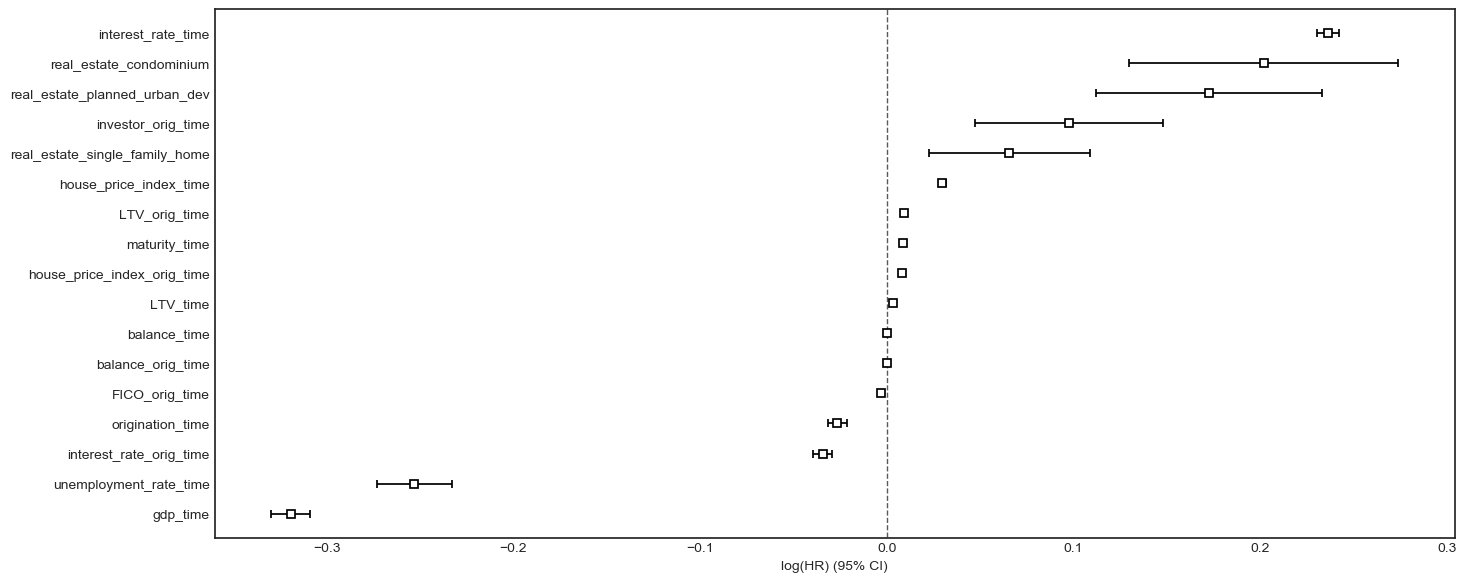

In [0]:
cox_tv.plot()

In [0]:
cox_tv.baseline_survival_[:10]

,baseline survival
1,0.999998
2,0.999995
3,0.999986
4,0.999971
5,0.999959
6,0.999948
7,0.999932
8,0.999924
9,0.999911
10,0.999903


### The estimated coefficients

Changed in version 0.22.0: use to be .hazards_

In [0]:
cox_tv.params_

origination_time                 -0.026377
maturity_time                     0.008612
balance_time                      0.000007
LTV_time                          0.003312
interest_rate_time                0.236499
house_price_index_time            0.029767
gdp_time                         -0.319236
unemployment_rate_time           -0.252926
real_estate_condominium           0.202032
real_estate_planned_urban_dev     0.172676
real_estate_single_family_home    0.065743
investor_orig_time                0.097674
balance_orig_time                -0.000007
FICO_orig_time                   -0.003158
LTV_orig_time                     0.009219
interest_rate_orig_time          -0.034306
house_price_index_orig_time       0.008454
dtype: float64

### Hazard ratios

The exp(coefficients)

In [0]:
cox_tv.hazard_ratios_

origination_time                  0.973968
maturity_time                     1.008649
balance_time                      1.000007
LTV_time                          1.003318
interest_rate_time                1.266806
house_price_index_time            1.030214
gdp_time                          0.726704
unemployment_rate_time            0.776525
real_estate_condominium           1.223887
real_estate_planned_urban_dev     1.188481
real_estate_single_family_home    1.067952
investor_orig_time                1.102604
balance_orig_time                 0.999993
FICO_orig_time                    0.996847
LTV_orig_time                     1.009261
interest_rate_orig_time           0.966276
house_price_index_orig_time       1.008490
Name: exp(coef), dtype: float64

### Concordance index

In [0]:
cindex_tv = concordance_index(data_cox_tv['stop'], -cox_tv.predict_partial_hazard(data_cox_tv), data_cox_tv['default_time'])

In [0]:
cindex_tv

0.8169598317017039

---

## 4.4 Random Survival Forests<a class="anchor" id="rsf"></a>

In [0]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

In [0]:
rstate = 124

In [0]:
def get_x_y_survival(dataset, col_event, col_time, val_outcome):
    if col_event is None or col_time is None:
        y = None
        x_frame = dataset
    else:
        y = np.empty(dtype=[(col_event, np.bool), (col_time, np.float64)],
                        shape=dataset.shape[0])
        y[col_event] = (dataset[col_event] == val_outcome).values
        y[col_time] = dataset[col_time].values

        x_frame = dataset.drop([col_event, col_time], axis=1)

    return x_frame, y

In [0]:
X_rf, y_rf = get_x_y_survival(data_cox, 'default_time', 'total_obs_time', 1)

In [0]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.25, random_state=rstate)

In [0]:
rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=rstate,
                          verbose=1)

In [0]:
rsf.fit(X_rf_train, y_rf_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.5min finished


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, min_samples_leaf=15,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=50, n_jobs=-1, oob_score=False,
                     random_state=124, verbose=1, warm_start=False)

In [0]:
rsf.score(X_rf_test, y_rf_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


0.7970134777974758

---

# 5. Deep Learning in Survival Analysis<a class="anchor" id="deeplearning_sa"></a>

## 5.1 DeepSurv<a class="anchor" id="deepsurv"></a>

In [0]:
# For preprocessing
import sklearn_pandas
from sklearn_pandas import DataFrameMapper 

from sklearn.model_selection import train_test_split

import torch
import torchtuples as tt

from pycox.evaluation import EvalSurv
from pycox.models import CoxPH, CoxCC, CoxTime

from pycox.models.cox_time import MLPVanillaCoxTime

In [0]:
# We also set some seeds to make this reproducable.
# Note that on gpu, there is still some randomness.
np.random.seed(1234)
_ = torch.manual_seed(123)

### Data preprocessing

In [0]:
data_ds = data_cox.copy()

In [0]:
#data_ds = data_ds.drop('id', axis = 1)

In [0]:
df_train = data_ds.copy()

In [0]:
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [0]:
cols_stand = ['balance_time', 'LTV_time', 'origination_time', 'maturity_time',
       'interest_rate_time', 'house_price_index_time', 'gdp_time', 'unemployment_rate_time',
       'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'interest_rate_orig_time', 'house_price_index_orig_time']

cols_leave = ['investor_orig_time', 'real_estate_condominium',
       'real_estate_planned_urban_dev', 'real_estate_single_family_home', 'total_obs_time', 'default_time']

#standardize = [([col], StandardScaler) for col in cols_stand]

standardize = [([col], StandardScaler()) for col in cols_stand]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [0]:
print(x_train.shape, x_test.shape, x_val.shape)

(32000, 19) (10000, 19) (8000, 19)


In [0]:
labtrans = CoxTime.label_transform()

In [0]:
get_target = lambda df: (df['total_obs_time'].values, df['default_time'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))
durations_test, events_test = get_target(df_test)
val = tt.tuplefy(x_val, y_val)

In [0]:
'''
get_target = lambda df: (df['total_obs_time'].values, df['default_time'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = x_val, y_val
'''

### Simple NN

In [0]:
from torch.nn import Dropout, Linear, Sequential, ReLU, SELU, BatchNorm1d
from torch.optim import SGD, Adam

In [0]:
n_nodes = 256

In [0]:
in_features = x_train.shape[1]
num_nodes = [n_nodes, n_nodes, n_nodes, n_nodes]
out_features = 1
batch_norm = True
dropout = 0.4
output_bias = False

In [0]:
net_ds = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout, output_bias=output_bias)

In [0]:
'''
network_ds = Sequential(
    Linear(in_features, n_nodes),
    ReLU(),
    BatchNorm1d(n_nodes),
    Dropout(0.2),
    
    Linear(n_nodes, n_nodes),
    ReLU(),
    BatchNorm1d(n_nodes),
    Dropout(0.2),
        
    Linear(n_nodes, n_nodes),
    ReLU(),
    BatchNorm1d(n_nodes),
    Dropout(0.2),
    Linear(n_nodes, out_features)
)
'''

'\nnetwork_ds = Sequential(\n    Linear(in_features, n_nodes),\n    ReLU(),\n    BatchNorm1d(n_nodes),\n    Dropout(0.2),\n    \n    Linear(n_nodes, n_nodes),\n    ReLU(),\n    BatchNorm1d(n_nodes),\n    Dropout(0.2),\n        \n    Linear(n_nodes, n_nodes),\n    ReLU(),\n    BatchNorm1d(n_nodes),\n    Dropout(0.2),\n    Linear(n_nodes, out_features)\n)\n'

In [0]:
net_ds

MLPVanilla(
  (net): Sequential(
    (0): DenseVanillaBlock(
      (linear): Linear(in_features=19, out_features=256, bias=True)
      (activation): ReLU()
      (batch_norm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.4, inplace=False)
    )
    (1): DenseVanillaBlock(
      (linear): Linear(in_features=256, out_features=256, bias=True)
      (activation): ReLU()
      (batch_norm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.4, inplace=False)
    )
    (2): DenseVanillaBlock(
      (linear): Linear(in_features=256, out_features=256, bias=True)
      (activation): ReLU()
      (batch_norm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.4, inplace=False)
    )
    (3): DenseVanillaBlock(
      (linear): Linear(in_features=256, out_features=256, bias=True)
      (activation): ReLU()
      (bat

In [0]:
model_deepsurv = CoxPH(net_ds, tt.optim.Adam)

### Training the model

In [0]:
batch_size = 128

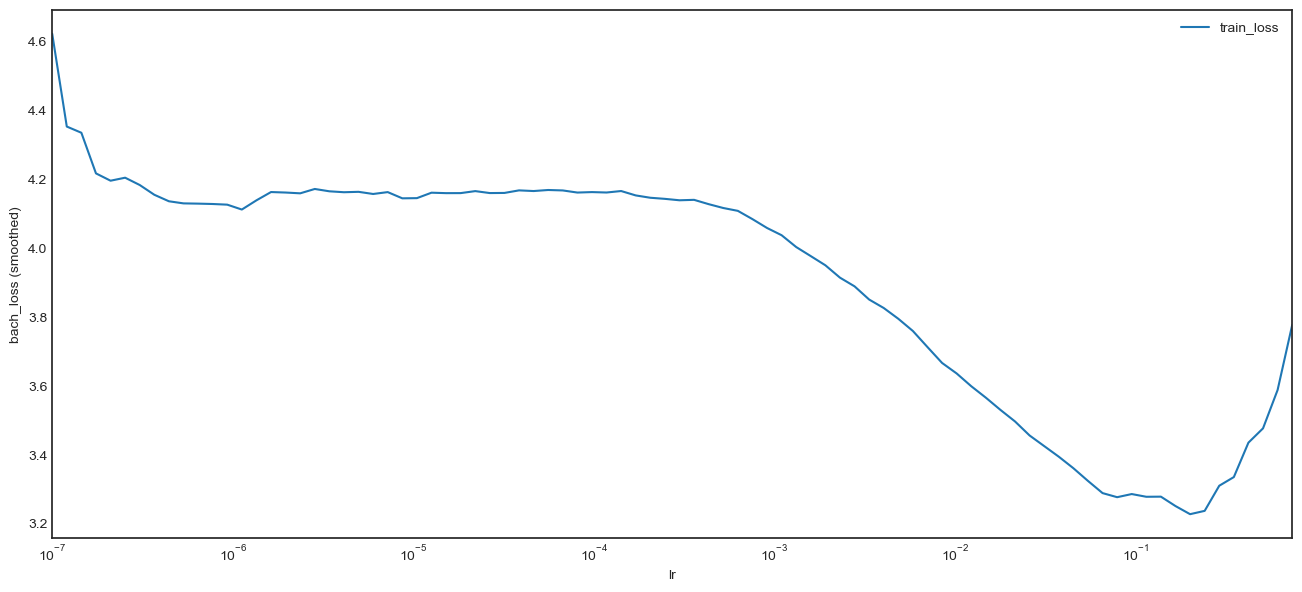

In [0]:
lrfinder = model_deepsurv.lr_finder(x_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

In [0]:
lrfinder.get_best_lr()

0.020092330025650584

In [0]:
model_deepsurv.optimizer.set_lr(0.001)

In [0]:
model_deepsurv.optimizer.param_groups[0]['lr']

0.001

In [0]:
epochs = 512

callbacks = [tt.callbacks.EarlyStopping()]
verbose = True

In [0]:
%%time
log = model_deepsurv.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[4s / 4s],		train_loss: 1.9863,	val_loss: 1.3404
1:	[4s / 9s],		train_loss: 1.5710,	val_loss: 1.2413
2:	[4s / 13s],		train_loss: 1.4730,	val_loss: 1.2831
3:	[4s / 17s],		train_loss: 1.4188,	val_loss: 1.1973
4:	[4s / 22s],		train_loss: 1.3922,	val_loss: 1.1636
5:	[4s / 27s],		train_loss: 1.3742,	val_loss: 1.1751
6:	[4s / 31s],		train_loss: 1.3561,	val_loss: 1.1691
7:	[4s / 36s],		train_loss: 1.3360,	val_loss: 1.1749
8:	[4s / 41s],		train_loss: 1.3199,	val_loss: 1.1696
9:	[4s / 45s],		train_loss: 1.3161,	val_loss: 1.1587
10:	[4s / 50s],		train_loss: 1.3026,	val_loss: 1.1544
11:	[4s / 55s],		train_loss: 1.3060,	val_loss: 1.1409
12:	[4s / 59s],		train_loss: 1.2941,	val_loss: 1.1413
13:	[4s / 1m:4s],		train_loss: 1.2915,	val_loss: 1.1594
14:	[4s / 1m:8s],		train_loss: 1.2798,	val_loss: 1.1357
15:	[4s / 1m:13s],		train_loss: 1.2804,	val_loss: 1.1394
16:	[4s / 1m:17s],		train_loss: 1.2777,	val_loss: 1.1440
17:	[4s / 1m:22s],		train_loss: 1.2713,	val_loss: 1.1497
18:	[4s / 1m:27s],		train_l

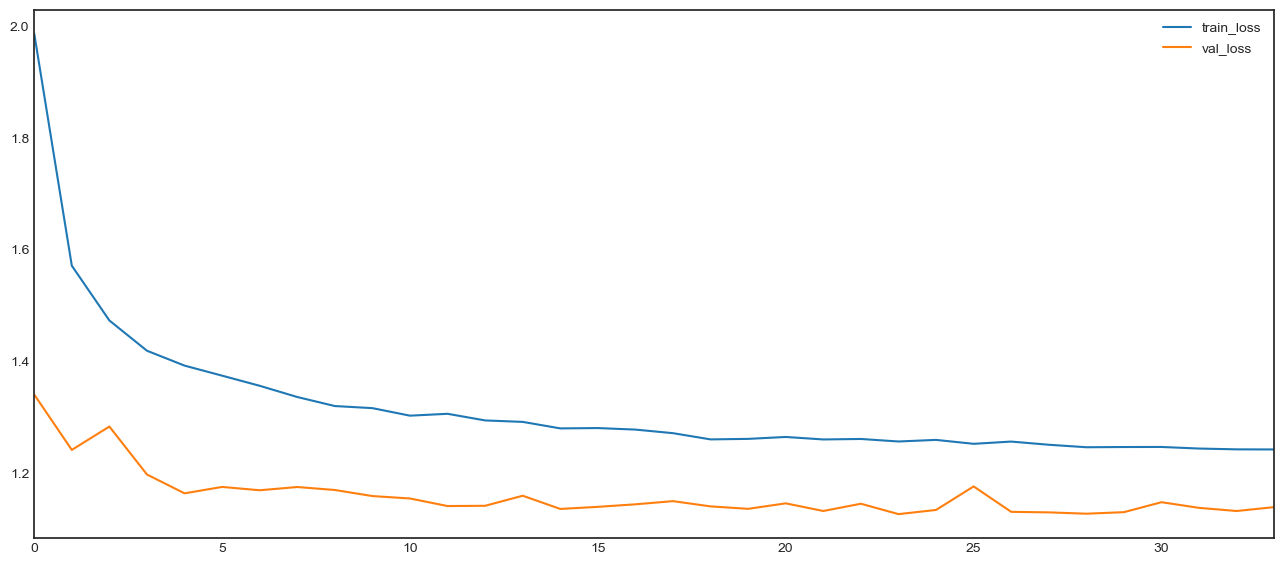

In [0]:
_ = log.plot()

In [0]:
model_deepsurv.partial_log_likelihood(*val).mean()

-5.242654

In [0]:
model_deepsurv.score_in_batches(val)

{'loss': 4.915094375610352}

### Prediction

In [0]:
_ = model_deepsurv.compute_baseline_hazards()

In [0]:
deepsurv = model_deepsurv.predict_surv_df(x_test)

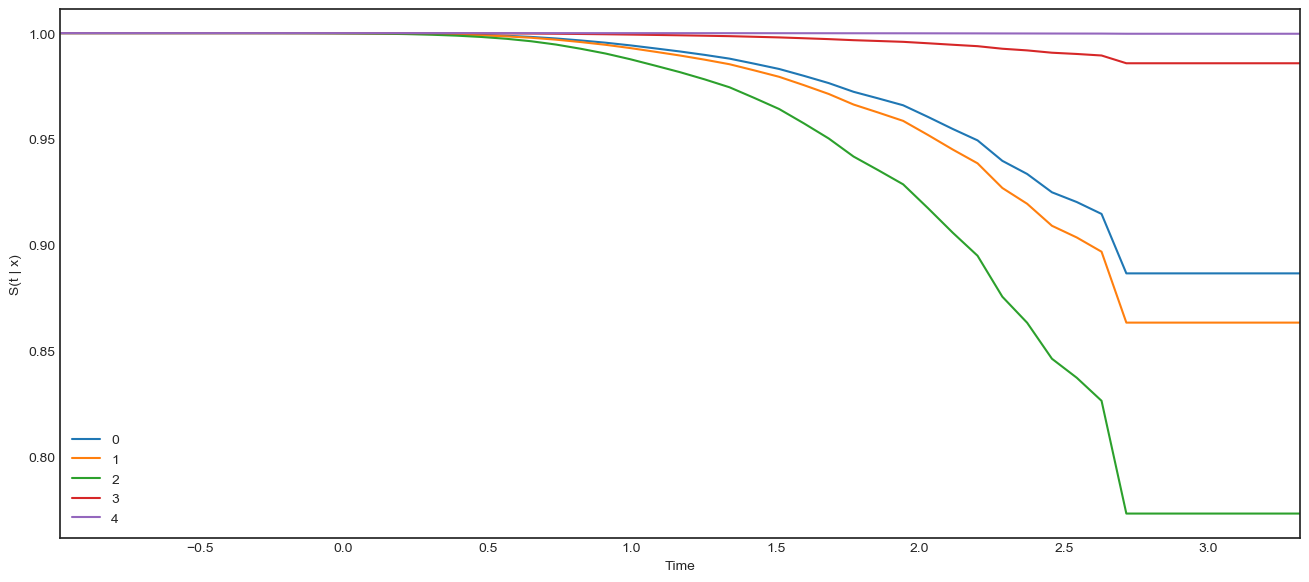

In [0]:
deepsurv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [0]:
model_deepsurv.baseline_hazards_.head()

duration
-0.984273    0.000192
-0.898189    0.000487
-0.812104    0.001240
-0.726020    0.003143
-0.639936    0.009442
Name: baseline_hazards, dtype: float32

### Evaluation Metrics

In [0]:
ev = EvalSurv(deepsurv, durations_test, events_test, censor_surv='km')

In [0]:
ev.concordance_td()

0.8424150843984598

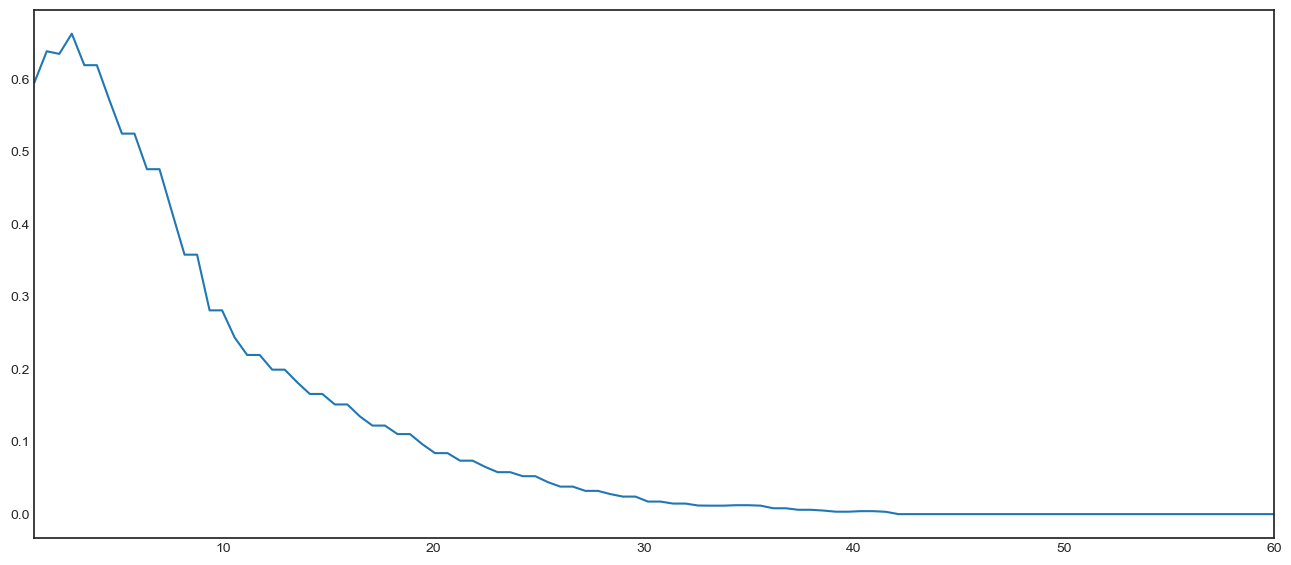

In [0]:
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

In [0]:
ev.integrated_brier_score(time_grid)

0.11487176920079373

In [0]:
ev.integrated_nbll(time_grid)

1.6275194724001085

---

## 5.2 DeepHit<a class="anchor" id="deephit"></a> 

The model called „DeepHit“ was introduced in a paper by Changhee Lee, William R. Zame, Jinsung Yoon, Mihaela van der Schaar in April 2018. It describes a deep learning approach to survival analysis implemented in a tensor flow environment.

DeepHit is a deep neural network that learns the distribution of survival times directly. This means that this model does not do any assumptions about an underlying stochastic process, so both the parameters of the model as well as the form of the stochastic process depends on the covariates of the specific dataset used for survival analysis. [x]

The model basically contains two parts, a shared sub-network and a family of cause-specific sub-networks. Due to this architecture a great advantage of DeepHit is that it easily can be used for survival datasets with one single risk but also with multiple competing risks.
The dataset used so far describes one single risk, the risk of default. Customers that did not experience the event of interest are censored. The reasons for censorship can either be that the event of interest was not experienced or another event happened that also led to the end of observation, but is not the event of interest for survival analysis. 
The original dataset has information about a second risk, the early repayment, also called payoff. For prior use the dataset was preprocessed in a way that customers with an early repayment were also labelled „censored“, because the only event of interest was the event of default. If the second risk also becomes the focus of attention in terms of survival analysis a second label for payoff (payoff = 2) can be introduced in the event column of the dataset.

In [0]:
data_cr = df.copy()

In [0]:
data_cr.insert(1, 'event',data_cr['status_time'])
data_cr.insert(2, 'duration',data_cr['total_obs_time'])
data_cr = data_cr.drop(['time','first_time','default_time','payoff_time','time_max','total_obs_time','status_time'],axis=1)

In [0]:
data_cr.head(5)

,id,event,duration,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
23,1,1,24,-7,113,29087.21,26.658065,9.200,146.45,2.715903,8.3,0,0,1,0,45000.0,715,69.4,9.200,87.03
25,2,2,2,18,138,105654.77,65.469851,7.680,225.10,2.151365,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
30,3,2,5,-6,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,0,0,1,0,48600.0,680,83.6,8.750,89.58
65,4,0,36,-2,119,52686.35,34.898842,10.500,189.82,2.836358,5.7,0,0,1,0,63750.0,587,81.8,10.500,97.99
68,5,2,3,18,138,52100.71,66.346343,9.155,222.39,2.361722,4.4,0,0,1,0,52800.0,527,80.0,9.155,186.91


To also handle competing risks DeepHit provides a flexible multi-task learning architecture.
Multi-task learning was originally inspired by human learning activities. People often apply the  knowledge learned from previous tasks to help learn a new task. For example, for a person who learns to ride the bicycle and unicycle together, the experience in learning to ride a bicycle can be utilized in riding a unicycle and vice versa. Similar to human learning, it is useful for multiple learning tasks to be learned jointly since the knowledge contained in a task can be leveraged by other tasks. 
In the context of deep learning models, multiple models could be trained, each model only learning one tasks (a). If this multiple tasks are related to each other, a multi-task learning model can be used with the aim to improve the learning of a model by using the knowledge achieved throughout the learning of related tasks in parallel (b). [y] 

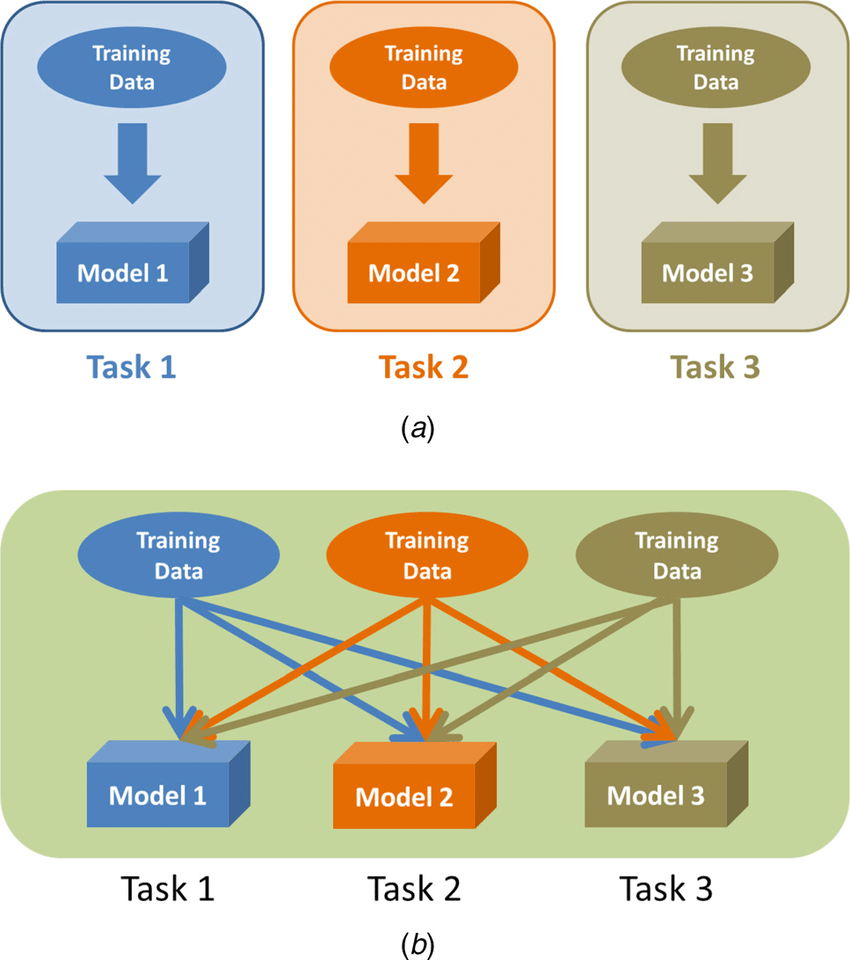

In [0]:
from IPython.display import Image
Image(filename='STLvsMTL.png',width=400, height=480) 

Multi-task learning is similar to transfer learning but has some significant differences. Transfer learning models use several source tasks in order to improve the performance on the target task. Multi-task learning models treat all tasks equally, there is no task importance hierarchy. There is no attention focus on one specific task. The goal of multi-task learning models is to improve the performance of all tasks.

The most commonly used approach to multi-task learning in neural networks is called hard parameter sharing. The general architecture of such a multi-task learning model describes two main parts. The first part is a shared sub-network, where the model learns the common representation of the related tasks. The model then splits into task-specific sub-networks in order to learn the non-common parts of the representation. The number of task-specific sub-networks is equal to the number of related tasks the model is trained on.
For the sake of completeness another approach to multi-task learning is soft parameter sharing that describes an architecture where each task has its own model with its own parameters. To encourage the parameters to become similar regularisation techniques are applied between the parameters of the task-specific models. Since DeepHit provides an architecture of hard parameter sharing, the approach of soft parameter sharing will be neglected in further explanations.

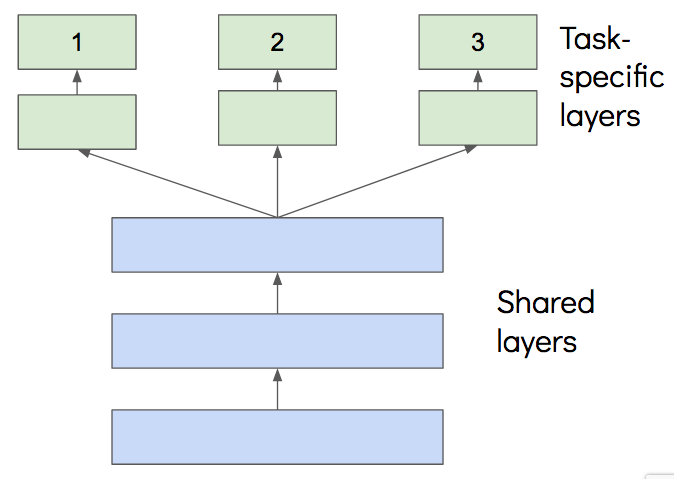

In [0]:
from IPython.display import Image
Image(filename='MTLarch.png',width=500, height=350) 

To train a multi-task learning model just as many loss functions as tasks are required. The model is then trained by backpropagation. The fact that the task-specific sub-networks share common hidden layers, allows comprehensive learning. Through the shared hidden layers features that are developed in the hidden layers of one task can also be used by other tasks. Multi-task learning enables features to be developed to support several tasks which would not be possible if multiple singe-task learning models would be trained on the related tasks in isolation. Also some hidden units can specialise on one task, providing information that are not important for the other tasks. By keeping the weights to these hidden units small gives these tasks the opportunity to ignore these hidden units. [z] 

With multi-task learning a model can increase its performance due to several reasons. By using the data of multiple related tasks multi-task learning increases the sample size that is used to train the model which is a kind of implicit data augmentation. The network sees more labels, even though these labels are not the labels from the same task but highly related tasks. A model that learns different similar tasks simultaneously is able to learn a more general representation that captures all of the tasks.
Moreover by learning multiple tasks together the network has to focus on important information rather than task-specific noise. The other tasks provide additional evidence for the relevance or irrelevance of the features and help to attract the network´s attention to focus on the important features.
Some tasks are harder to learn even by themselves. A model can benefit from learning the hard task combined with an easier related task. Multi-task learning allows the model to eavesdrop, learn the hard task through the simple related task, and therefore learn the hard task easier and faster than learning the hard task in isolation. 
In addition different related tasks can treat each other as a form of regularisation term since the model has to learn a general representation of all tasks. Learning the tasks in a single-task learning approach would bear the risk of overfitting on one task. [a] 

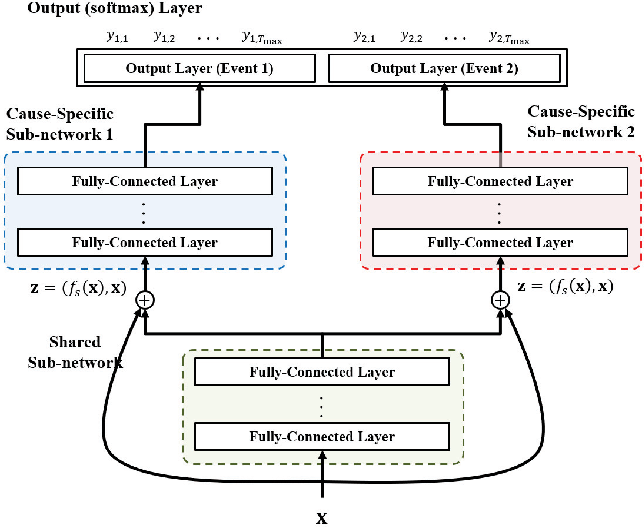

In [0]:
from IPython.display import Image
Image(filename='DeepHit.png',width=500, height=400) 

The architecture of the DeepHit model is similar to the conventional multi-task learning architecture of hard parameter sharing, but has two main differences. DeepHit provides a residual connection between the original covariates and the input of the cause-specific sub-networks. This means that the input of the cause-specific sub-networks is not only the output of the preceded shared sub-network but also the original covariates. These additional input allows the cause-specific sub-network to better learn the non-common representation of the multiple causes.
The other difference refers to the final output of the model. DeepHit uses one single softmax output layer so that the model can learn the joint distribution of the competing events instead of their marginal distribution. Thus the output of the DeepHit model is a vector for every subject in the dataset giving the probabilities that the subject with covariates x will experience the event k for every timestamp t within the observation time. The probabilities of one subject sum up to 1.

$$y = [y_{1,1},...,y_{1,Tmax},...,y_{K,1},...,y_{K,Tmax}]$$


The visualisation of the DeepHit model shows the architecture for a survival dataset of two competing risks. This architecture can easily be adjusted to more or less competing risks by adding   or removing cause-specific sub-networks. The architecture of the DeepHit model depends on the number of risks.

To implement the model the [DeepHit repository](https://github.com/chl8856/DeepHit) has to be cloned to create a local copy on the computer. The following packages need to be imported:

In [0]:
from class_DeepHit import Model_DeepHit, log, div
import import_data as impt
from import_data import f_get_Normalization, f_get_fc_mask2, f_get_fc_mask3
import get_main
from get_main import f_get_minibatch 
from main_RandomSearch import save_logging, load_logging , get_random_hyperparameters
from utils_eval import c_index, brier_score, weighted_c_index, weighted_brier_score
from summarize_results import load_logging
import utils_network as utils

import tensorflow as tf
from tensorflow.contrib.layers import fully_connected as FC_Net
from sklearn.model_selection import train_test_split
import random
import time, datetime, os
from termcolor import colored
_EPSILON = 1e-08
seed = 1234

DeepHit also needs the characteristic survival analysis input setting containing the event labels, the durations as well as the covariates. A function is provided that either applies standardisation or normalization of the data. For this analysis standardisation was applied on the data. 

The variable num_Category describes the dimension of the time horizon of interest and is needed in order to calculate the output dimension of the output layer of the model.
num_Event gives the number of events excluding the case of censoring, since censoring is not an event of interest. This number defines the architecture of the model, it specifies the number of cause-specific sub-networks and is also needed to calculate the dimension of the output layer, which is the multiplication of num_Category and num_Event.
The input dimension is defined by the number of covariates used to feed the network. 

In [0]:
# DeepHit input settings

# Characteristic data format E, T, X
event              = np.asarray(data[['event']])
time               = np.asarray(data[['duration']])
dhdata             = np.asarray(data.iloc[:,1:18])

# Standardisation of the data
dhdata             = f_get_Normalization(dhdata, 'standard')

# Dimension of time horizon of interest (equivalent to the output dimension per risk)
num_Category       = int(np.max(time) * 1.2) 

# Number of events (censoring is not included)
num_Event          = int(len(np.unique(event)) - 1) 

# Input dimension
x_dim              = np.shape(dhdata)[1]

# Based on the data, mask1 and mask2 needed to calculate the loss functions
# To calculate loss 1 - log-likelihood loss
mask1              = f_get_fc_mask2(time, event, num_Event, num_Category)
# To calculate loss 2 - cause-specific ranking loss
mask2              = f_get_fc_mask3(time, -1, num_Category)

DIM                = (x_dim)
DATA               = (dhdata, time, event)
MASK               = (mask1, mask2)


The hyperparameters of DeepHit can be tuned by running random search using cross-validation. The function get_random_hyperparameters randomly takes values for parameters out of a predefined range for those parameters. 
Possible candidates for parameter tuning can be:

* Batch size
* Number of layers for the shared sub-network
* Number of layers for the cause-specific sub-network
* Number of nodes for the shared sub-network
* Number of nodes for the cause-specific sub-network
* Learning rate
* Dropout
* Activation function

The chosen parameters are forwarded to the function get_valid_performance along with the event labels, durations and covariates (summarized in DATA) as well as the masks for the loss calculations (summarized in MASK). This function takes the forwarded parameters to build a DeepHit model corresponding to the number of events of interest as well as the number of layers and nodes for the sub-networks. The dataset is then spilt into training, validation and test sets in order to start training the model on the training set using the chosen parameters. The training is done with mini batches of the training set over 50.000 iterations. Every 1000 iteration a prediction is done on the validation set and the best model is saved to the specified file path. The best result is returned if there is no improvement for the next 6000 iterations (early stopping).


In [0]:
# Hyperparameter tuning

# Number of training/validation/test splits during tuning
OUT_ITERATION               = 1

# Number of random search iterations
RS_ITERATION                = 20

# For saving purposes of the best parameters
data_mode = 'mortgage'
out_path  = data_mode + '/results'

# Times when the validation is performed
eval_times = [4,8,18]

for itr in range(OUT_ITERATION):
    
    if not os.path.exists(out_path + '/itr_' + str(itr) + '/'):
        os.makedirs(out_path + '/itr_' + str(itr) + '/')

    max_valid = 0
    log_name = out_path + '/itr_' + str(itr) + '/hyperparameters_log.txt'

    for r_itr in range(RS_ITERATION):
        print('OUTER_ITERATION: ' + str(itr))
        print('Random search... itr: ' + str(r_itr))
        new_parser = get_random_hyperparameters(out_path)
        print(new_parser)

        # get validation performance given the hyperparameters
        tmp_max = get_valid_performance(DATA, MASK, new_parser, itr, eval_times, MAX_VALUE=max_valid)

        if tmp_max > max_valid:
            max_valid = tmp_max
            max_parser = new_parser
            save_logging(max_parser, log_name)  # save the hyperparameters if they provide the maximum validation performance

        print('Current best: ' + str(max_valid))

DeepHit is build with Xavier initialisation and dropout for all the layers and is trained by back propagation via the Adam optimizer. To train a survival analysis model like DeepHit a loss function has to be minimised that is especially designed to handle censored data.
The loss function of the DeepHit model is the sum of two terms. 

$$ L_{Total} = L_{1} + L_{2}$$

$L_{1}$ is the log-likelihood of the joint distribution of the first hitting time and event. This function is modified in a way that it captures censored data and considers competing risks if necessary. 
The log-likelihood function also consists out of two terms. The first term captures the event and the time, the event occurred, for the uncensored customers. The second term captures the time of censoring for the censored customers giving the information that the customer did not default up to that time.

$L_{2}$ is a combination of cause-specific ranking loss functions since DeepHit is a multi-task learning model and therefore needs cause-specific loss functions for training. The ranking loss function incorporates the estimated cumulative incidence function calculated at the time the specific event occurred. The formula of the cumulative incidence function (CIF) is as follows:

$$F_{k^{*}}(t^{*}|x^{*}) = \sum_{s^{*}=0}^{t^{*}}P(s=s^{*},k=k^{*}|x=x^{*})$$

This function expresses the probability that a particular event k occurs on or before time t conditional on covariates x. To get the estimated CIF, the sum of the probabilities from the first observation time to the time, the event k occurred, is computed.

$$ \hat{F}_{k^{*}}(s^{*}|x^{*}) = \sum_{m=0}^{s^{*}}y^{*}_{k,m}$$

The cause-specific ranking loss function adapts the idea of concordance. A customer that experienced the event k on a specific time t should have a higher probability than a customer that will experience the event sometime after this specific time t. The ranking loss function therefore compares pairs of customers that experienced the same event of interest and penalizes an incorrect ordering of pairs.

After the training process the saved optimised hyper-parameters as well as the corresponding trained model can be used for the final prediction on the test dataset.


In [0]:
# Load the saved optimised hyperparameters
in_hypfile = in_path + '/itr_' + str(out_itr) + '/hyperparameters_log.txt'
in_parser = load_logging(in_hypfile)


# Forward the hyperparameters
mb_size                     = in_parser['mb_size']

iteration                   = in_parser['iteration']

keep_prob                   = in_parser['keep_prob']
lr_train                    = in_parser['lr_train']

h_dim_shared                = in_parser['h_dim_shared']
h_dim_CS                    = in_parser['h_dim_CS']
num_layers_shared           = in_parser['num_layers_shared']
num_layers_CS               = in_parser['num_layers_CS']

if in_parser['active_fn'] == 'relu':
    active_fn                = tf.nn.relu
elif in_parser['active_fn'] == 'elu':
    active_fn                = tf.nn.elu
elif in_parser['active_fn'] == 'tanh':
    active_fn                = tf.nn.tanh
else:
    print('Error!')


initial_W                   = tf.contrib.layers.xavier_initializer()

alpha                       = in_parser['alpha']  #for log-likelihood loss
beta                        = in_parser['beta']  #for ranking loss
gamma                       = in_parser['gamma']  #for RNN-prediction loss
parameter_name              = 'a' + str('%02.0f' %(10*alpha)) + 'b' + str('%02.0f' %(10*beta)) + 'c' + str('%02.0f' %(10*gamma))

# Create the dictionaries 
# For the input settings
input_dims                  = { 'x_dim'                : x_dim,
                                'num_Event'            : num_Event,
                                'num_Category'         : num_Category}

# For the hyperparameters
network_settings            = { 'h_dim_shared'         : h_dim_shared,
                                'h_dim_CS'             : h_dim_CS,
                                'num_layers_shared'    : num_layers_shared,
                                'num_layers_CS'        : num_layers_CS,
                                'active_fn'            : active_fn,
                                'initial_W'            : initial_W }

 
# Create the DeepHit network architecture
tf.reset_default_graph()

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

model = Model_DeepHit(sess, "DeepHit", input_dims, network_settings)
saver = tf.train.Saver()

sess.run(tf.global_variables_initializer())

# Training, test sets split
(tr_data,te_data, tr_time,te_time, tr_label,te_label, 
 tr_mask1,te_mask1, tr_mask2,te_mask2)  = train_test_split(dhdata, time, event, mask1, mask2, test_size=0.20, random_state=seed) 
    
# Restoring the trained model
saver.restore(sess, in_path + '/itr_' + str(out_itr) + '/models/model_itr_' + str(out_itr))

## Final prediction on the test set covariates
pred = model.predict(te_data)
    


    ### EVALUATION
    result1, result2 = np.zeros([num_Event, len(eval_times)]), np.zeros([num_Event, len(eval_times)])

    for t, t_time in enumerate(eval_times):
        eval_horizon = int(t_time)

        if eval_horizon >= num_Category:
            print( 'ERROR: evaluation horizon is out of range')
            result1[:, t] = result2[:, t] = -1
        else:
            risk = np.sum(pred[:,:,:(eval_horizon+1)], axis=2) #risk score until EVAL_TIMES
            for k in range(num_Event):
                result1[k, t] = weighted_c_index(tr_time, (tr_label[:,0] == k+1).astype(int), risk[:,k], te_time, (te_label[:,0] == k+1).astype(int), eval_horizon) 
                result2[k, t] = weighted_brier_score(tr_time, (tr_label[:,0] == k+1).astype(int), risk[:,k], te_time, (te_label[:,0] == k+1).astype(int), eval_horizon) 

    FINAL1[:, :, out_itr] = result1
    FINAL2[:, :, out_itr] = result2

    ### SAVE RESULTS
    row_header = []
    for t in range(num_Event):
        row_header.append('Event_' + str(t+1))

    col_header1 = []
    col_header2 = []
    for t in eval_times:
        col_header1.append(str(t) + 'months c_index')
        col_header2.append(str(t) + 'months B_score')

    # c-index result
    df1 = pd.DataFrame(result1, index = row_header, columns=col_header1)
    df1.to_csv(in_path + '/result_CINDEX_itr' + str(out_itr) + '.csv')

    # brier-score result
    df2 = pd.DataFrame(result2, index = row_header, columns=col_header2)
    df2.to_csv(in_path + '/result_BRIER_itr' + str(out_itr) + '.csv')

    ### PRINT RESULTS
    print('========================================================')
    print('ITR: ' + str(out_itr+1) + ' DATA MODE: ' + data_mode + ' (a:' + str(alpha) + ' b:' + str(beta) + ' c:' + str(gamma) + ')' )
    print('SharedNet Parameters: ' + 'h_dim_shared = '+str(h_dim_shared) + ' num_layers_shared = '+str(num_layers_shared) + 'Non-Linearity: ' + str(active_fn))
    print('CSNet Parameters: ' + 'h_dim_CS = '+str(h_dim_CS) + ' num_layers_CS = '+str(num_layers_CS) + 'Non-Linearity: ' + str(active_fn)) 

    print('--------------------------------------------------------')
    print('- C-INDEX: ')
    print(df1)
    print('--------------------------------------------------------')
    print('- BRIER-SCORE: ')
    print(df2)
    print('========================================================')


    
### FINAL MEAN/STD
# c-index result
df1_mean = pd.DataFrame(np.mean(FINAL1, axis=2), index = row_header, columns=col_header1)
df1_std  = pd.DataFrame(np.std(FINAL1, axis=2), index = row_header, columns=col_header1)
df1_mean.to_csv(in_path + '/result_CINDEX_FINAL_MEAN.csv')
df1_std.to_csv(in_path + '/result_CINDEX_FINAL_STD.csv')

# brier-score result
df2_mean = pd.DataFrame(np.mean(FINAL2, axis=2), index = row_header, columns=col_header2)
df2_std  = pd.DataFrame(np.std(FINAL2, axis=2), index = row_header, columns=col_header2)
df2_mean.to_csv(in_path + '/result_BRIER_FINAL_MEAN.csv')
df2_std.to_csv(in_path + '/result_BRIER_FINAL_STD.csv')


### PRINT RESULTS
print('========================================================')
print('- FINAL C-INDEX: ')
print(df1_mean)
print('--------------------------------------------------------')
print('- FINAL BRIER-SCORE: ')
print(df2_mean)
print('========================================================')

---

# 6. Evaluation<a class="anchor" id="evaluation"></a>

For the evaluation of survival analysis models the performance measures need to take censored data into account. The most common evaluation metric in survival analysis is the concordance index. It shows the model`s ability to correctly provide a reliable ranking of the survival times based on the individual risk scores. The idea behind concordance is that a subject that dies at time s should have a higher risk at time s than a subject who survives beyond time s. The concordance index expresses the proportion of concordant pairs in a dataset, thus estimates the probability that, for a random pair of individuals, the predicted survival times of the two individuals have the same ordering as their true survival times. A concordance index of 1 represents a model with perfect prediction, an index of 0.5 is equal to random prediction.
For a better understanding of this definition the concordance index is calculated on some simple example predictions. The following table shows the true default times of four theoretical customers along with default time predictions of three different models.


Ex. 1 | True default time | Model 1 | Model 2 |Model 3
:-----:|:------:|:-----:|:------:|:------:
Customer A|1|1|1|2
Customer B|2|2|2|3
Customer C|3|3|4|4
Customer D|4|4|3|5

To calculate the concordance index the number of concordant pairs has to be divided by the number of possible. By having four customers the following pairs are possible:
(A,B) , (A,C) , (A,D) , (B,C) , (B,D) , (C,D). The total number of possible pairs is 6. Model 1 predicts that A defaults before B, and the true default time confirms that A defaults before B. The pair (A,B) is a concordant pair. This comparison needs to be done for every possible pair. For the prediction of Model 1 all possible pairs are concordant, which results in an Concordance index of 1 - perfect prediction.
For the prediction of Model 2 there are five concordant pairs, but the for the pair (C,D) the model predicts that D defaults before C, whereas the true default times show that C defaults before D. With this the concordance index is 0.83 (5/6).
The concordance index of Model 3 is also equal to 1, since the model predicts the correct order of the possible pairs even though the actual default times are not right in isolation.

The next example shows the computation of the concordance index in case of right-censoring:

Ex. 2 | True default time|Model prediction|Censoring
:----:|:----:|:----:|:----:
Customer A|1|1|False
Customer B|2|2|True
Customer C|3|4|False
Customer D|4|3|False

The first step is to figure the number of possible pairs. The default times of customer A can be compared to the default times of the other customers. The customer B is censored, which means that the only information given is the fact that customer B did not default up to time 2, but there is no information if customer B will default and if so, when the customer will experience the event of default. Therefore a comparison between customer B and C as well as customer B and D is impossible because these customers defaulted after customer B was censored. The comparison between customers C and D is possible since both customers are not censored. In total there are four possible pairs: 
(A,B) , (A,C) , (A,D), (C,D)
The second step is to check if these possible pairs are concordant. The first three pairs are concordant, the pair (C,D) is discordant. The result is a concordance index of 0.75 (3/4).

The dataset used for the blogpost features the case of right-censoring but the reason for censoring is that these customers are still in the phase of repaying and their loans has not matured yet. Therefore the time of censoring is equal to the last observation time. Due to this the case that some customer default after a customer was censored is not possible. The example of the concordance index in case of right-censoring is shown for the sake of completeness since other survival datasets can have this case. A medical dataset for example can have data about patients with a heart disease. If a patient dies due to different reasons than a heart disease this patient would be censored. This can happen during the observation time and other patients can die due to a heart disease at a later time.

---

# 7. Conclusion<a class="anchor" id="conclusion"></a>

# 8. References<a class="anchor" id="references"></a>

[1] IFRS 9 Financial Instruments - https://www.ifrs.org/issued-standards/list-of-standards/ifrs-9-financial-instruments/#about (accessed: 29.01.2020)

[2] Ernst & Young (December 2014): Impairment of financial instruments under IFRS 9 - https://www.ey.com/Publication/vwLUAssets/Applying_IFRS:_Impairment_of_financial_instruments_under_IFRS_9/$FILE/Apply-FI-Dec2014.pdf

[3] Bank for International Settlements (December 2017): IFRS 9 and expected loss provisioning - Executive Summary - https://www.bis.org/fsi/fsisummaries/ifrs9.pdf



[4] Liberato Camilleri (March 2019): History of survival snalysis - https://timesofmalta.com/articles/view/history-of-survival-analysis.705424



[5] Sucharith Thoutam (July 2016): A brief introduction to survival analysis

[6] Taimur Zahid (March 2019): Survival Analysis - Part A - https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e 

[7] Lore Dirick, Gerda Claeskens, Bart Baesens (2016): Time to default in credit scoring using survival analysis: a benchmark study

[8] lifelines - Introduction to survival analysis - https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html

[9] Nidhi Dwivedi, Sandeep Sachdeva (2016): Survival analysis: A brief note - https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html

[10] Maria Stepanova, Lyn Thomas (2000): Survival analysis methods for personal loan data

[11] Hazard Function: Simple Definition - https://www.statisticshowto.datasciencecentral.com/hazard-function/ (accessed 29.01.2020)

[1]<a class="anchor" id="ref-one"></a> Jared L. Katzman, Uri Shaham, Alexander Cloninger, Jonathan Bates, Tingting Jiang,
and Yuval Kluger. DeepSurv: personalized treatment recommender system using a Cox
proportional hazards deep neural network. 2018.

[x] Changhee Lee, William R. Zame, Jinsung Yoon, Mihaela van der Schaar (April 2018): DeepHit: A Deep Learning Approach to Survival Analysis with Competing Risks

[y] Yu Zhang, Qiang Yang (2018): A survey on Multi-Task Learning

[z] Rich Caruana (1997): Multitask Learning

[a] Sebastian Rude (October 2017): An Overview of Multi-Task Learning in Deep Neural Networks

[[1]](#ref-one)    #### put in texts above as link to reference list